In [1]:
from google.colab import files


uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving premier_league_2020_2021.csv to premier_league_2020_2021.csv


Saving premier_league_2021_2022.csv to premier_league_2021_2022.csv


Saving premier_league_2022_2023.csv to premier_league_2022_2023.csv


Saving premier_league_first_10_2020_2021.csv to premier_league_first_10_2020_2021.csv


Saving premier_league_first_10_2021_2022.csv to premier_league_first_10_2021_2022.csv


Saving premier_league_first_10_2022_2023.csv to premier_league_first_10_2022_2023.csv


Saving premier_league_2023_2024_first_10_matches.csv to premier_league_2023_2024_first_10_matches.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# تحميل البيانات
data_2020_21 = pd.read_csv('premier_league_first_10_2020_2021.csv')
data_2021_22 = pd.read_csv('premier_league_first_10_2021_2022.csv')
data_2022_23 = pd.read_csv('premier_league_first_10_2022_2023.csv')
data_2023_24 = pd.read_csv('premier_league_2023_2024_first_10_matches.csv')

final_2020_21 = pd.read_csv('premier_league_2020_2021.csv')
final_2021_22 = pd.read_csv('premier_league_2021_2022.csv')
final_2022_23 = pd.read_csv('premier_league_2022_2023.csv')

# تجهيز بيانات التدريب (2020-2021 + 2021-2022)
train_data = pd.concat([data_2020_21, data_2021_22])
train_final = pd.concat([final_2020_21, final_2021_22])

# بيانات الاختبار (2022-2023)
test_data = data_2022_23
test_final = final_2022_23

# بيانات التنبؤ (2023-2024)
predict_data = data_2023_24

# الميزات المستخدمة للتنبؤ بعدد النقاط
features = ['points', 'wins', 'draws', 'losses', 'goals_scored', 'goals_conceded',
            'goal_difference', 'avg_possession', 'avg_shots_per_game',
            'avg_shots_on_target', 'shot_accuracy', 'pass_accuracy']

# إعداد البيانات
X_train = train_data[features]
y_train = train_final['points']  # الهدف: النقاط النهائية

X_test = test_data[features]
y_test = test_final['points']

X_predict = predict_data[features]

# تدريب نموذج Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred_test = model.predict(X_test)

# التنبؤ للموسم الجديد
y_pred_2023_24 = model.predict(X_predict)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("تقييم نموذج Linear Regression:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"الدقة: {r2*100:.1f}%")

# إضافة التنبؤات إلى البيانات اضافة عمود جديد عرض النقاط الحاليه جنب المتوقعة
predict_data['predicted_final_points'] = np.round(y_pred_2023_24).astype(int)
predict_data['current_points'] = predict_data['points']

# ترتيب الفرق حسب النقاط المتوقعة
final_prediction = predict_data[['team', 'current_points', 'predicted_final_points', 'goal_difference']]
final_prediction = final_prediction.sort_values('predicted_final_points', ascending=False)
final_prediction = final_prediction.reset_index(drop=True)   # لاعادة ترتيب الفهرس بطريقة منظمة وميعرضش القديم
final_prediction.index = final_prediction.index + 1   # خلينا نبدا من واحد وليس صفر

# عرض النتائج
print("\n" + "="*70)
print("التنبؤ بعدد النقاط النهائي لموسم 2023-2024 باستخدام Linear Regression")
print("="*70)
print(final_prediction.to_string())

تقييم نموذج Linear Regression:
Mean Squared Error: 16.94
R² Score: 0.95
الدقة: 94.6%

التنبؤ بعدد النقاط النهائي لموسم 2023-2024 باستخدام Linear Regression
                 team  current_points  predicted_final_points  goal_difference
1           Tottenham              26                      94               13
2             Arsenal              23                      84               10
3     Manchester City              22                      79                8
4           Liverpool              21                      76                6
5         Aston Villa              20                      73                4
6            Brighton              18                      64                0
7    Newcastle United              17                      63                2
8   Manchester United              16                      57               -2
9           Brentford              16                      56               -6
10           West Ham              14                 

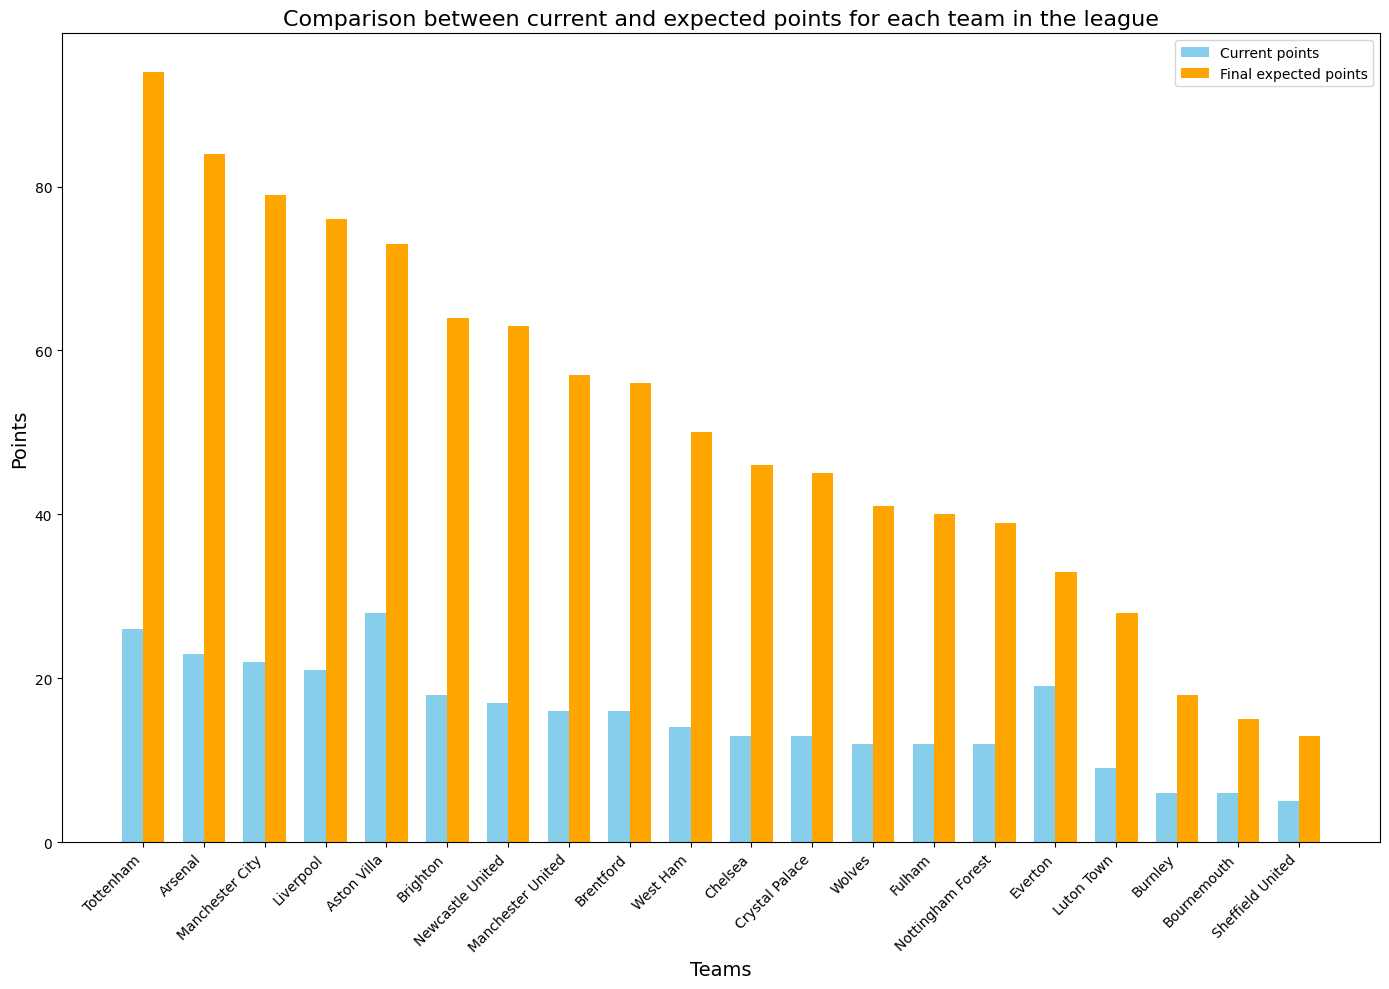

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# البيانات من الجدول
teams = [
    'Tottenham', 'Arsenal', 'Manchester City', 'Liverpool', 'Aston Villa',
    'Brighton', 'Newcastle United', 'Manchester United', 'Brentford', 'West Ham',
    'Chelsea', 'Crystal Palace', 'Wolves', 'Fulham', 'Nottingham Forest',
    'Everton', 'Luton Town', 'Burnley', 'Bournemouth', 'Sheffield United'
]

current_points = [26, 23, 22, 21, 28, 18, 17, 16, 16, 14, 13, 13, 12, 12, 12, 19, 9, 6, 6, 5]
predicted_final_points = [94, 84, 79, 76, 73, 64, 63, 57, 56, 50, 46, 45, 41, 40, 39, 33, 28, 18, 15, 13]

# إنشاء الرسم البياني
plt.figure(figsize=(14, 10))

# تحديد مواقع الأعمدة
x = np.arange(len(teams))

# رسم الأعمدة
width = 0.35
plt.bar(x - width/2, current_points, width, label='Current points', color='skyblue')
plt.bar(x + width/2, predicted_final_points, width, label='Final expected points', color='orange')

# إضافة العناوين والتسميات
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.title('Comparison between current and expected points for each team in the league', fontsize=16)
plt.xticks(x, teams, rotation=45, ha='right')
plt.legend()

# تحسين التخطيط
plt.tight_layout()

# إظهار الرسم البياني
plt.show()